In [9]:
import requests
import bs4
import time
import random

In [27]:
my_headers={"referer": "https://www.coupang.com/np/categories/502492?channel=plp_C2",
     "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36"
}

In [28]:
total_data_list=[]
for page_number in range (1,8):
    url="https://www.coupang.com/np/categories/502537?listSize=60&brand=&offerCondition=&filterType=&isPriceRange=false&minPrice=&maxPrice=&page={}&channel=user&fromComponent=Y&selectedPlpKeepFilter=&sorter=bestAsc&filter=&component=502437&rating=0".format(page_number)
    res = requests.get(url=url, headers=my_headers)
    
    soup=bs4.BeautifulSoup(res.text)
    
    div_elements =soup.select("dd.descriptions > div.name")
    for e in div_elements:
        div_elements = e
        data_list=[]
        data_list.append(div_elements.text.strip())
        total_data_list.append(data_list)
    time.sleep(1)

In [29]:
total_data_list 

[['쉐프엠 투움바파스타, 230g, 4개'],
 ['다원 원형 분모자, 250g, 8개'],
 ['비비고 시원 바지락 칼국수 4인분 (냉동), 1284g, 1개'],
 ['쉐프엠 베이컨까르보나라 파스타, 230g, 4개'],
 ['천일식품 사누끼 우동면 (냉동), 230g, 40개'],
 ['칠갑농산 감자수제비, 380g, 3개'],
 ['칠갑농산 생메밀면사리, 360g, 4개'],
 ['곰곰 투움바 파스타 밀키트, 699g, 1개'],
 ['오뚜기 컵누들 우동 컵라면, 38.1g, 15개'],
 ['테이스티나인 수제 모둠전 (냉장), 500g, 1세트'],
 ['하티스푼 리얼통함박 스파게티, 335g, 2개'],
 ['면사랑 볶음짬뽕면 (냉동), 365g, 3개'],
 ['홈스토랑 애슐리 바지락 듬뿍 봉골레 파스타, 732g, 1개'],
 ['맑은물에 가볍게즐기는 누들곤약냉면, 863g, 2개'],
 ['다원 넙적 분모자, 250g, 8개'],
 ['비비고 버섯잡채 4인분 (냉동), 1180g, 1개'],
 ['천일식품 수타식 중화면 (냉동), 1.15kg, 8개'],
 ['홍야 고기짬뽕, 1260g, 2개'],
 ['해조미 라이트19 미역국수 300g x 6ea + 비빔소스 60g x 6ea, 1세트'],
 ['오뚜기 알뜰당면, 2.4kg, 1개, 본품선택'],
 ['해조미 라이트19 미역국수 300g x 6ea + 모밀소스 35g x 6ea, 1세트'],
 ['해조미 라이트19 톳국수 300g x 6ea + 비빔소스 60g x 6ea, 1세트'],
 ['해조미 라이트19 미역국수, 300g, 6개'],
 ['면사랑 해물짬뽕 (냉동), 388g, 3개'],
 ['삼호농산 항아리 감자 수제비, 450g, 4개'],
 ['칠갑농산 들깨 칼국수, 387g, 2개'],
 ['바른식 산메촌 메밀 비빔막국수, 822g, 1개'],
 ['홈스토랑 애슐리 쉬림프 비스크 로제 파스타, 930g, 1개'],
 ['바른식 산메촌 코다리 회 막국수, 912g, 1개'],
 [

In [30]:
import pandas as pd
df=pd.DataFrame(total_data_list)

In [31]:
df.to_csv('wordtext6.txt',index=False)

In [32]:
from konlpy.tag import Twitter 
from collections import Counter

In [35]:
file = open('wordtext6.txt', 'r', encoding="UTF-8")

lists = file.readlines()

file.close()

#lists

In [36]:
twitter = Twitter() 
morphs = [] 

for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 
print(morphs)

[[('0', 'Number'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('쉐프', 'Noun'), ('엠', 'Noun'), ('투움바', 'Noun'), ('파스타', 'Noun'), (',', 'Punctuation'), ('230', 'Number'), ('g', 'Alpha'), (',', 'Punctuation'), ('4', 'Number'), ('개', 'Noun'), ('"', 'Punctuation'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('다', 'Adverb'), ('원', 'Noun'), ('원형', 'Noun'), ('분모', 'Noun'), ('자', 'Suffix'), (',', 'Punctuation'), ('250', 'Number'), ('g', 'Alpha'), (',', 'Punctuation'), ('8', 'Number'), ('개', 'Noun'), ('"', 'Punctuation'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('비비고', 'Noun'), ('시원', 'Noun'), ('바지락', 'Noun'), ('칼국수', 'Noun'), ('4', 'Number'), ('인분', 'Noun'), ('(', 'Punctuation'), ('냉동', 'Noun'), ('),', 'Punctuation'), ('1284', 'Number'), ('g', 'Alpha'), (',', 'Punctuation'), ('1', 'Number'), ('개', 'Noun'), ('"', 'Punctuation'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('쉐프', 'Noun'), ('엠', 'Noun'), ('베이컨', 'Noun'), ('까르보나라', 'Noun'), ('파스타', 'Noun'), (',', 'Punctuation'), ('230', 'Number'),

In [44]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and("인분" not in word)and ("입" not in word)and("세트" not in word)and("팩" not in word)and("산" not in word)and("것" not in word)and("냉동" not in word)and("개" not in word)and("냉장" not in word)and("용" not in word)and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word): 
            noun_adj_adv_list.append(word) 

print(noun_adj_adv_list)

['쉐프', '엠', '투움바', '파스타', '원', '원형', '분모', '비비고', '시원', '바지락', '쉐프', '엠', '베이컨', '파스타', '식품', '사누끼', '우동', '감자', '생', '메밀', '사리', '투움바', '파스타', '밀', '키트', '오뚜기', '컵누', '우동', '컵라면', '테이스티', '모', '하티', '스푼', '리얼', '통함박', '면', '사랑', '볶음', '짬뽕', '홈스', '토', '애슐리', '바지락', '듬뿍', '봉골레', '파스타', '맑은', '물', '누', '곤약', '냉면', '원', '넙적', '분모', '비비고', '버섯', '잡채', '식품', '식', '중화', '홍', '고기', '짬뽕', '해', '조미', '라이트', '미역', '비빔', '소스', '오뚜기', '알뜰', '품', '선택', '해', '조미', '라이트', '미역', '모밀', '소스', '해', '조미', '라이트', '톳', '비빔', '소스', '해', '조미', '라이트', '미역', '면', '사랑', '해물짬뽕', '호농', '항아리', '감자', '들깨', '식', '메밀', '비빔', '홈스', '토', '애슐리', '쉬', '림프', '비스크', '로제', '파스타', '식', '코다리', '회', '오뚜기', '면', '사랑', '미트', '볼로냐', '둘', '명인', '포', '두부', '집', '반찬', '연구소', '불고기', '잡채', '메', '중화', '짜장', '홍', '오징어짬뽕', '강릉', '감자', '옹심이', '둘', '명인', '면', '두부', '젠', '미코', '리아', '생', '라면', '면', '사랑', '베이컨', '크림', '식', '메밀', '물', '식', '자재', '생', '메밀', '면', '사랑', '멸치', '면', '사랑', '새우', '튀김', '우동', '생', '우동', '짜장', '사리', '전문점', '토담', '감자',

In [45]:
count = Counter(noun_adj_adv_list)

In [46]:
words = dict(count.most_common())

In [47]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [48]:
%matplotlib inline 

import matplotlib 
from matplotlib import rc
rc('font', family='NanumBarunGothic')

In [49]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    font_path = 'C:/Users/win10/workspace/font/NanumBarunGothic.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(words)

<class 'numpy.ndarray'>
(800, 800, 3)


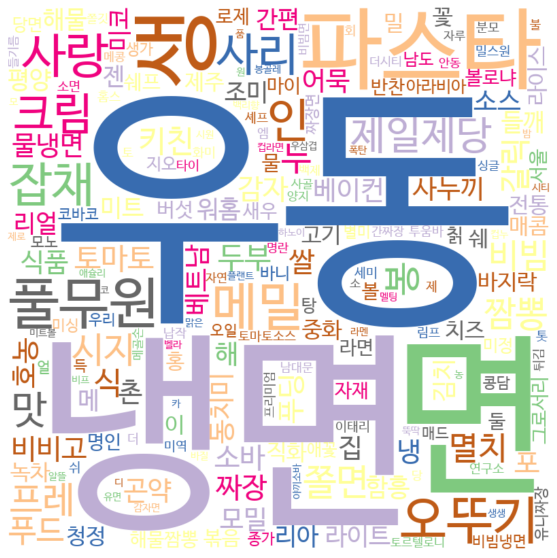

In [50]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('business_anlytics_worldcloud.png')